In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

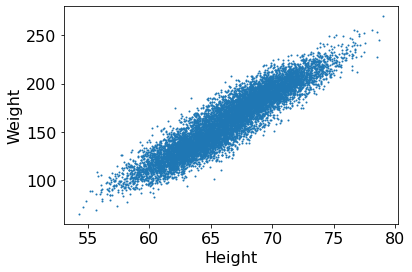

In [5]:
#Loading data
genders = np.genfromtxt("height_weight_genders.csv", delimiter=",", skip_header=1, usecols=[0], \
                        converters={0: lambda x: 0 if b"Male" in x else 1})
heights = np.genfromtxt("height_weight_genders.csv",
                        delimiter=",",
                        skip_header=1,
                        usecols=[1])
weights = np.genfromtxt("height_weight_genders.csv",
                        delimiter=",",
                        skip_header=1,
                        usecols=[2])
indices = np.argsort(heights)
heights = heights[indices].reshape((len(heights), 1))
weights = weights[indices].reshape((len(weights), 1))
genders = genders[indices].reshape((len(genders), 1))

#Scatter plot
plt.scatter(heights, weights, s=1)
plt.xlabel('Height', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout

In [6]:
def standardise(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    matrix = np.copy(standardised_matrix * row_of_stds)
    return matrix + row_of_means

In [7]:
data_input, input_row_of_means, input_row_of_stds = standardise(heights)
data_output, output_row_of_means, output_row_of_stds = standardise(weights)

In [8]:
# Building linear/polynomial regressions

def polynomial_basis(data_inputs, degree):
    X_matrix = np.ones((len(data_inputs), 1))
    for i in range(degree):
        X_matrix = np.c_[X_matrix, np.power(data_inputs, i + 1)]
    return X_matrix


def polynomial_regression(data_matrix, data_outputs):
    return np.linalg.solve(data_matrix.T @ data_matrix,
                           data_matrix.T @ data_outputs)


def prediction_function(data_matrix, weights):
    return data_matrix @ weights

In [9]:
degree_linear = 1
degree_polynomial = 5
data_matrix_linear = polynomial_basis(data_input, degree_linear)
data_matrix_polynomial = polynomial_basis(data_input, degree_polynomial)
optimal_weights_linear = polynomial_regression(data_matrix_linear, data_output)
optimal_weights_polynomial = polynomial_regression(data_matrix_polynomial,
                                                   data_output)

print("Optimal linear regression coefficients are equal to: {w}. \
    \nOptimal polynomial regression (d = {d}) coefficients are equal to: {p}"                                                                             .\
      format(w = optimal_weights_linear.T, d = degree_polynomial, p = optimal_weights_polynomial.T))

Optimal linear regression coefficients are equal to: [[1.05784633e-15 9.24756299e-01]].     
Optimal polynomial regression (d = 5) coefficients are equal to: [[-1.54785290e-03  1.05220213e+00  4.03175447e-03 -7.60510612e-02
  -4.05488657e-04  6.63445950e-03]]


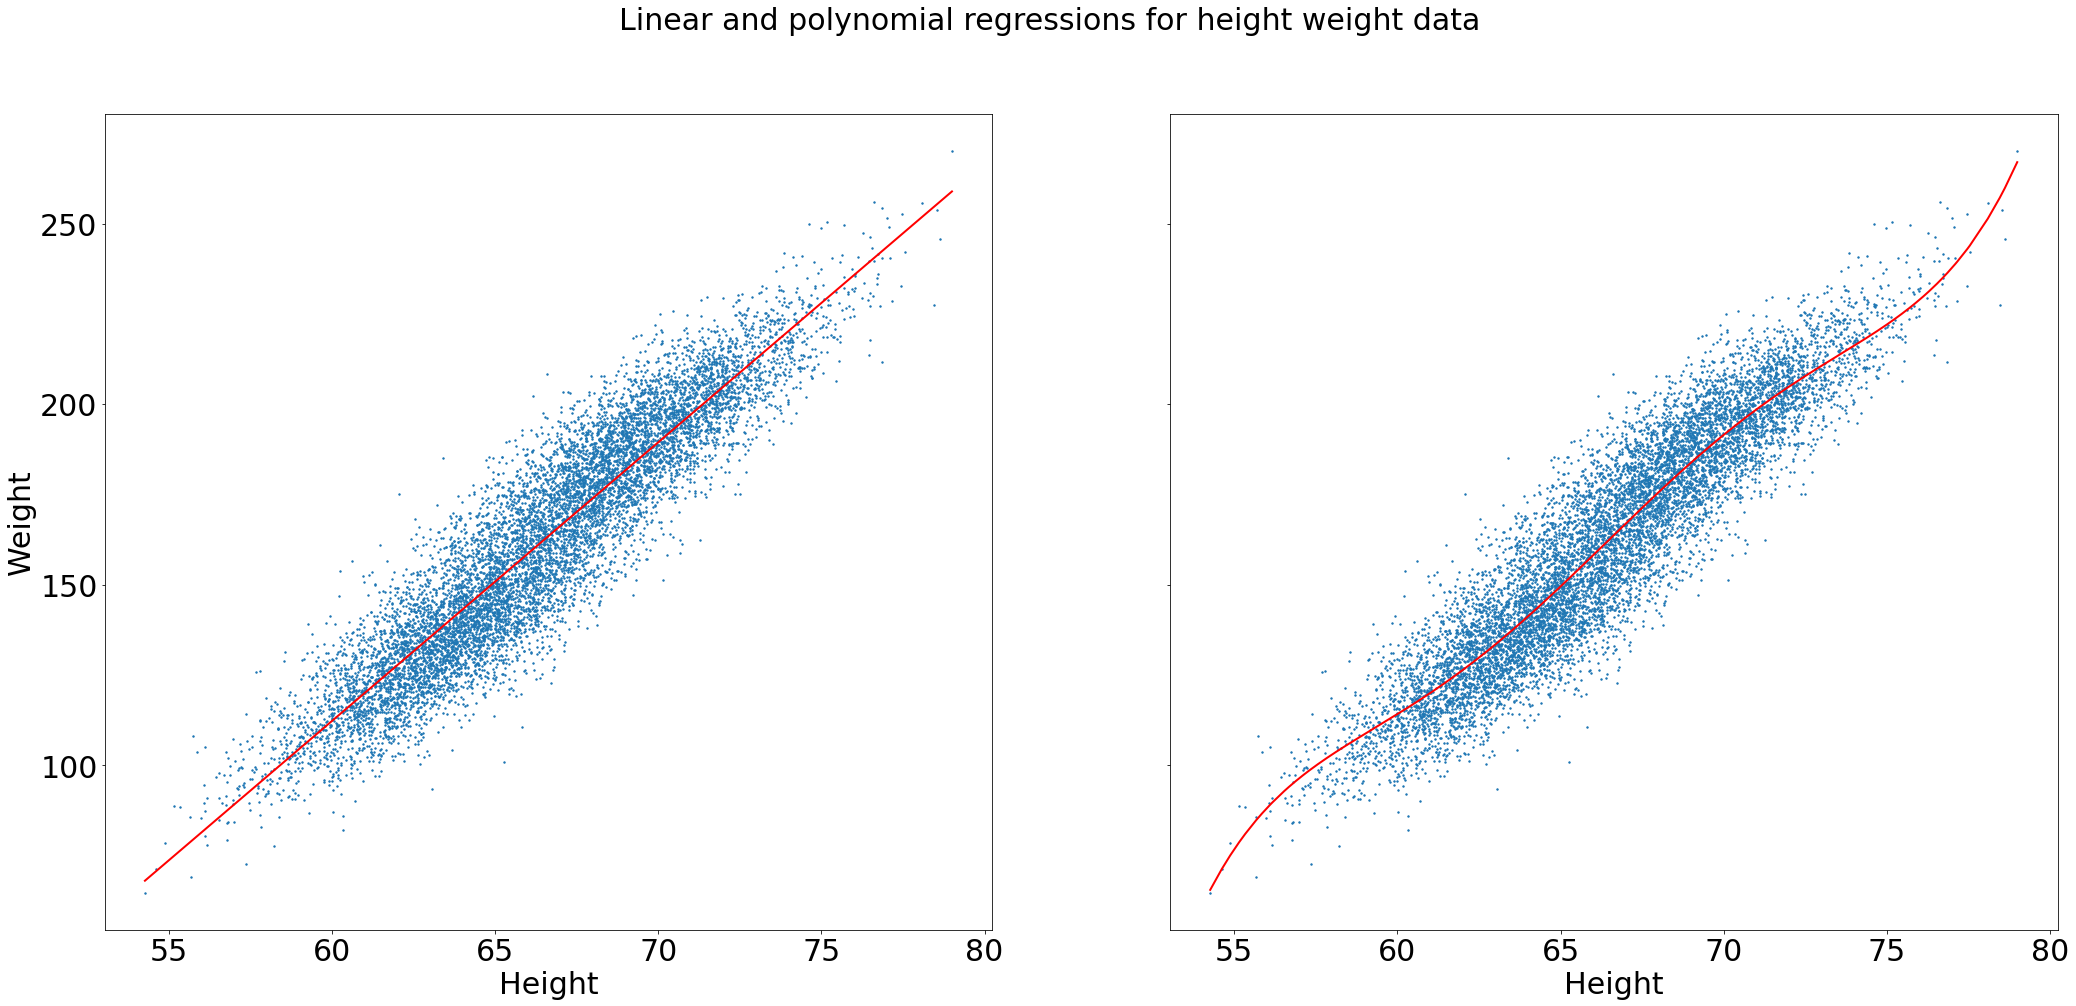

In [10]:
predictions_linear = de_standardise(prediction_function(data_matrix_linear, optimal_weights_linear),\
                                    output_row_of_means, output_row_of_stds)
predictions_polynomial = de_standardise(prediction_function(data_matrix_polynomial, optimal_weights_polynomial),\
                                       output_row_of_means, output_row_of_stds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 15))
fig.suptitle('Linear and polynomial regressions for height weight data',
             fontsize=30)
for ax in fig.get_axes():
    ax.scatter(heights, weights, s=2)
    ax.set(xlabel='Height', ylabel='Weight')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(30)
    ax.label_outer()
ax1.plot(heights, predictions_linear, linewidth=2, color='r')
ax2.plot(heights, predictions_polynomial, linewidth=2, color='r')
plt.tight_layout;

In [13]:
def gradient_descent(objective, gradient, initial_weights, step_size=1, \
                     no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In [14]:
def mean_squared_error(data_matrix, data_outputs, weights):
    P=data_matrix
    W=weights
    Y=data_outputs
    s=len(data_matrix)
    return (np.linalg.norm(P @ W - Y))**2 / (2 * s)

def mean_squared_error_gradient(data_matrix, data_outputs, weights):
    P=data_matrix
    W=weights
    Y=data_outputs
    s=len(data_matrix)
    return P.T @ (P @ W - Y) / s

In [15]:
objective_linear = lambda weights: mean_squared_error(data_matrix_linear,data_output, weights)
gradient_linear = lambda weights: mean_squared_error_gradient(data_matrix_linear, data_output, weights)

initial_weights_linear = np.zeros((degree_linear + 1, 1))
step_size_linear = 0.9 * len(data_matrix_linear) / (np.linalg.norm(data_matrix_linear))**2


gd_optimal_weights_linear = gradient_descent(objective_linear, gradient_linear,
                                             initial_weights_linear,
                                             step_size_linear, 100, 10)[0]

Iteration 10/100, objective = 0.0724219628360558.
Iteration 20/100, objective = 0.07241289402768661.
Iteration 30/100, objective = 0.07241289396950247.
Iteration 40/100, objective = 0.0724128939695021.
Iteration 50/100, objective = 0.07241289396950212.
Iteration 60/100, objective = 0.07241289396950218.
Iteration 70/100, objective = 0.07241289396950218.
Iteration 80/100, objective = 0.07241289396950218.
Iteration 90/100, objective = 0.07241289396950218.
Iteration 100/100, objective = 0.07241289396950218.
Iteration completed after 100/100, objective = 0.07241289396950218.
